### spaceship Titanic Kaggle 2025 Murban

In [15]:
import pandas as pd

# Charger le fichier train.csv
file_path = r"C:\\Users\\tompa\\OneDrive\\Bureau\\Spaceship_Kaggle\\train.csv"  # Chemin vers le fichier
df = pd.read_csv(file_path)

# Afficher les 5 premières lignes (optionnel)
print("Aperçu des données :")
print(df.head())



Aperçu des données :
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False 

### Description of each feature


Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group 
are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

1/ Missing Values

In [16]:
import pandas as pd

missing_data = df.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing_data)


Missing Values:
 CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64


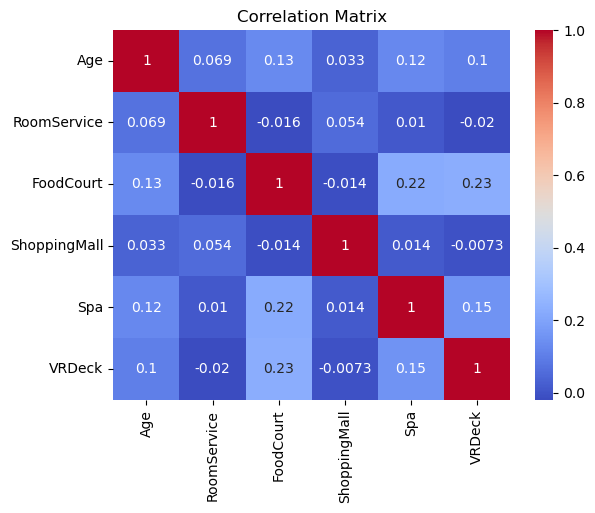

In [13]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


We can observe that each numerical feature seems not related to another one.
The highest rate is 0.23 and 0.22 between Spa/VRDeck/ShoppingMall/Foodcourt
These are all the same types of values : money amount. We can merge them together to obtain a TotalSpend

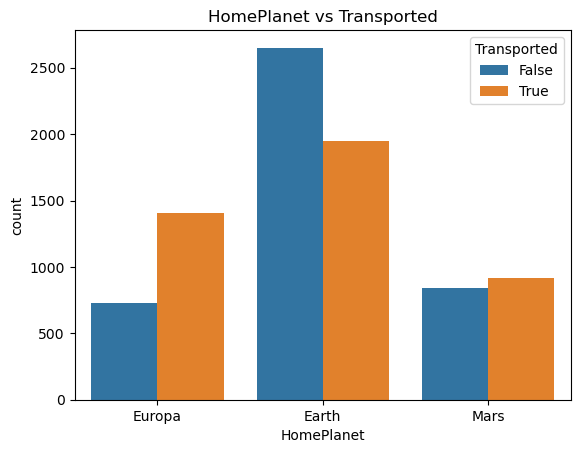

In [17]:
# Example: Analyze the 'HomePlanet' feature
sns.countplot(data=df, x='HomePlanet', hue='Transported')
plt.title("HomePlanet vs Transported")
plt.show()


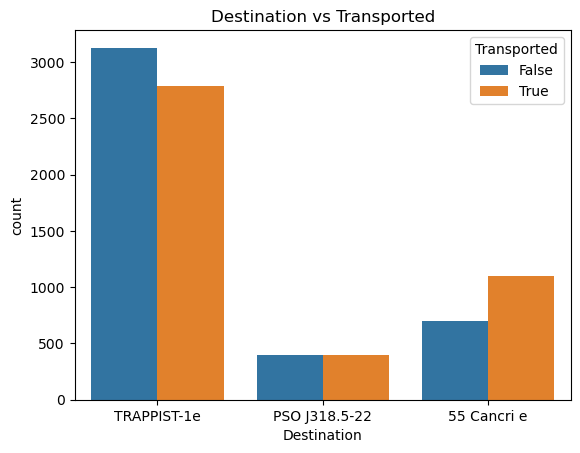

In [18]:
sns.countplot(data=df, x='Destination', hue='Transported')
plt.title("Destination vs Transported")
plt.show()